In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

from src.cache import cache

set_matplotlib_formats("svg")

In [ ]:
from pprint import pprint

from src.models.propensity_scores.text import get_data

pprint(d._X_text["text_lag0"].sample(10).to_list())

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-german-cased")

<Axes: >

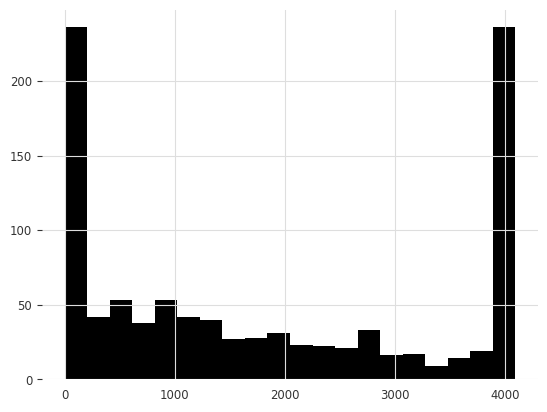

In [23]:
d = get_data(cutoff=500)
texts = d._X_text["text_lag0"]
texts.sample(1000).apply(lambda x: len(tokenizer.tokenize(x))).clip(0, 4096).hist(
    bins=20
)

In [1]:
from src.models.propensity_scores.text import f1_augmented, f1_combi, f1_text, f1_ts

f1_ts()
f1_text(cutoff=1000)
# f1_combi(cutoff=1000)
# f1_augmented(cutoff=1000)

Cross-validated F1 score: 0.185 +/- 0.060
Cross-validated F1 score: 0.157 +/- 0.060


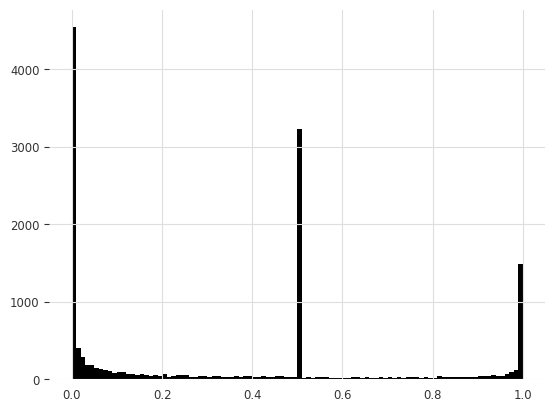

In [8]:
import matplotlib.pyplot as plt

from src.models.propensity_scores.text import get_text_probas

X_text_proba = get_text_probas(cutoff=500)
plt.hist(X_text_proba[:, 1], bins=100)
plt.show()

In [13]:
proba = X_text_proba[:, 0]
sum((proba < 0.95) & (proba > 0.5)) / len(proba)

In [ ]:
df["text_lag-1"].str.split().str.len().describe()

count    14157.000000
mean      2054.008264
std       1394.894754
min          0.000000
25%        873.000000
50%       2008.000000
75%       2954.000000
max       7889.000000
Name: text_lag-1, dtype: float64

input lenghts:

- electra: 128 tokens
- bert: 512 tokens
- llama 2: 4096 tokens